In [1]:
# import relevant packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from acquire import get_crime_data
from datetime import datetime
import prepare
import seaborn as sns
from wrangle import *
from explore import *
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_seq_items', None)
pd.set_option('expand_frame_repr', True)
pd.set_option('display.large_repr', 'truncate')
np.set_printoptions(linewidth=160)

In [2]:
# plotting defaults
plt.rc('figure', figsize=(23, 10))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

In [3]:
df = get_crime_data(use_cache = False)

Acquiring data from api


In [4]:
df = wrangle_merged_df(drop_columns = True)

Using cached csv


In [5]:
df.crime_type.count()

353070

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353070 entries, 0 to 353069
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   crime_type         353070 non-null  object         
 1   family_violence    353070 non-null  object         
 2   occurrence_time    353070 non-null  datetime64[ns] 
 3   occurrence_date    353070 non-null  datetime64[ns] 
 4   report_time        353070 non-null  datetime64[ns] 
 5   report_date        353070 non-null  datetime64[ns] 
 6   location_type      353070 non-null  object         
 7   address            353070 non-null  object         
 8   zip_code           353070 non-null  float64        
 9   council_district   353070 non-null  int64          
 10  sector             353070 non-null  object         
 11  latitude           353070 non-null  float64        
 12  longitude          353070 non-null  float64        
 13  clearance_status   353070 non

In [7]:
df

,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,pandemic_lockdown,the_geom,district_name,battalion_id,code,battalion_code,bureau_name,patrol_area,shape_area,shape_length
0,PUBLIC INTOXICATION,N,2021-12-31 23:50:00,2021-12-31,2021-12-31 23:50:00,2021-12-31,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,406 E 6TH ST,78701.0,9,GEORGE,30.267300,-97.738857,cleared by arrest,2021-12-31,True,0 days 00:00:00,False,MULTIPOLYGON (((-97.735785029775 30.2641758809...,GEORGE 2,194,1297,G1,NORTH,DTAC,3.600168e+06,7922.102059
1,BURGLARY OF VEHICLE,N,2021-12-31 21:45:00,2021-12-31,2022-01-01 01:28:00,2022-01-01,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,701 TRINITY ST,78701.0,9,GEORGE,30.268218,-97.738693,not cleared,2022-01-04,False,0 days 03:43:00,False,MULTIPOLYGON (((-97.735785029775 30.2641758809...,GEORGE 2,194,1297,G1,NORTH,DTAC,3.600168e+06,7922.102059
2,VIOL CITY ORDINANCE - WRECKER,N,2021-12-31 20:00:00,2021-12-31,2022-01-09 10:07:00,2022-01-09,OTHER / UNKNOWN,512 NECHES ST,78701.0,9,GEORGE,30.266586,-97.738502,not cleared,2022-02-02,False,8 days 14:07:00,False,MULTIPOLYGON (((-97.735785029775 30.2641758809...,GEORGE 2,194,1297,G1,NORTH,DTAC,3.600168e+06,7922.102059
3,RESISTING ARREST OR SEARCH,N,2021-12-31 15:20:00,2021-12-31,2021-12-31 15:20:00,2021-12-31,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,400 RED RIVER ST,78701.0,9,GEORGE,30.264693,-97.737904,cleared by arrest,2022-01-06,True,0 days 00:00:00,False,MULTIPOLYGON (((-97.735785029775 30.2641758809...,GEORGE 2,194,1297,G1,NORTH,DTAC,3.600168e+06,7922.102059
4,THEFT FROM BUILDING,N,2021-12-31 12:07:00,2021-12-31,2022-01-03 17:08:00,2022-01-03,COMMERCIAL / OFFICE BUILDING,507 SABINE ST,78701.0,9,GEORGE,30.265421,-97.736138,not cleared,2022-02-01,False,3 days 05:01:00,False,MULTIPOLYGON (((-97.735785029775 30.2641758809...,GEORGE 2,194,1297,G1,NORTH,DTAC,3.600168e+06,7922.102059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353065,THEFT,N,2018-01-03 12:40:00,2018-01-03,2018-01-04 10:21:00,2018-01-04,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,200 LAVACA ST,78701.0,9,GEORGE,30.265334,-97.746641,not cleared,2018-01-05,False,0 days 21:41:00,False,MULTIPOLYGON (((-97.743504022756 30.2662144984...,GEORGE 4,194,1296,G1,NORTH,DTAC,3.501785e+06,7850.762882
353066,CRED CARD ABUSE - OTHER,N,2018-01-02 00:12:00,2018-01-02,2018-01-07 10:45:00,2018-01-07,OTHER / UNKNOWN,242 W 2ND ST,78701.0,9,GEORGE,30.265059,-97.746075,not cleared,2018-01-09,False,5 days 10:33:00,False,MULTIPOLYGON (((-97.743504022756 30.2662144984...,GEORGE 4,194,1296,G1,NORTH,DTAC,3.501785e+06,7850.762882
353067,THEFT,N,2018-01-01 17:00:00,2018-01-01,2018-01-01 17:27:00,2018-01-01,DEPARTMENT / DISCOUNT STORE,320 CONGRESS AVE,78701.0,9,GEORGE,30.266100,-97.744000,not cleared,2018-01-02,False,0 days 00:27:00,False,MULTIPOLYGON (((-97.743504022756 30.2662144984...,GEORGE 4,194,1296,G1,NORTH,DTAC,3.501785e+06,7850.762882
353068,CRIMINAL TRESPASS,N,2018-01-01 12:00:00,2018-01-01,2018-05-23 10:15:00,2018-05-23,CONSTRUCTION SITE,202 NUECES ST,78701.0,9,GEORGE,30.266255,-97.749880,not cleared,2018-06-04,False,141 days 22:15:00,False,MULTIPOLYGON (((-97.743504022756 30.2662144984...,GEORGE 4,194,1296,G1,NORTH,DTAC,3.501785e+06,7850.762882


In [8]:
#Assign my .shp file to a variable named “asutin_map”
austin_map = gpd.read_file('Austin Police Department Districts/geo_export_27045068-72e9-44ae-8c59-d3e16cc9d233.shp')

In [9]:
austin_map

,battalion_,battalio_2,bureau_nam,code,color,command_ph,district_n,external_k,input_by,date_input,time_input,jurisdicti,modified_b,date_modif,time_modif,objectid,patrol_are,primary_ke,sector_nam,shape_area,shape_leng,sort_order,geometry
0,H1,205.0,SOUTH,1300,16711808.0,512-974-8106,HENRY 4,1300,bmartinlimuel,2014-12-22,11:31:16.000,59.0,APD_ADMIN,2018-10-09,13:41:54.000,13.0,SOUTHCENTRAL,59.0,HENRY,4.523399e+07,27115.487629,1.0,"POLYGON ((-97.71135 30.22875, -97.71093 30.228..."
1,APT4,520.0,None,1336,16776960.0,None,AOA,1336,bmartinlimuel,2014-12-22,11:31:16.000,145.0,ap7657,2016-05-27,13:55:16.000,48.0,ABIA,39.0,APT,1.348928e+08,121793.575921,0.0,"POLYGON ((-97.67427 30.21814, -97.67424 30.218..."
2,I1,215.0,CENTRAL,1305,16711808.0,512-974-5203,IDA 7,1305,bmartinlimuel,2014-12-22,11:31:16.000,60.0,AP7657,2018-09-06,08:54:50.000,19.0,NORTHCENTRAL,23.0,IDA,9.218470e+07,43885.566418,1.0,"POLYGON ((-97.72384 30.37193, -97.72383 30.371..."
3,B1,144.0,NORTH,1277,16711808.0,512-974-5774,BAKER 6,1277,bmartinlimuel,2014-12-22,11:31:16.000,10.0,AP7657,2018-09-06,08:26:22.000,10.0,CENTRALWEST,26.0,BAKER,1.258262e+08,65698.657337,1.0,"POLYGON ((-97.73947 30.33693, -97.73981 30.334..."
4,B1,144.0,NORTH,1276,16711808.0,512-974-5774,BAKER 7,1276,bmartinlimuel,2014-12-22,11:31:16.000,10.0,APD_ADMIN,2018-10-09,13:41:49.000,18.0,CENTRALWEST,58.0,BAKER,2.456788e+08,160610.888932,1.0,"POLYGON ((-97.75539 30.33648, -97.75541 30.336..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,CHAR,400.0,CENTRAL,1281,16744576.0,512-974-5900,CHARLIE 6,1281,bmartinlimuel,2014-12-22,11:31:16.000,11.0,AP7657,2018-09-06,08:35:16.000,50.0,CENTRALEAST,3.0,CHARLIE,6.854670e+07,52268.357217,1.0,"POLYGON ((-97.62875 30.28972, -97.62882 30.289..."
86,H1,205.0,SOUTH,1301,16711808.0,512-974-8106,HENRY 1,1301,bmartinlimuel,2014-12-22,11:31:16.000,59.0,AP7657,2018-09-06,08:51:31.000,62.0,SOUTHCENTRAL,42.0,HENRY,4.185281e+07,28092.527384,1.0,"POLYGON ((-97.73635 30.25078, -97.73635 30.250..."
87,I1,215.0,CENTRAL,1306,16711808.0,512-974-5203,IDA 8,1306,bmartinlimuel,2014-12-22,11:31:16.000,60.0,APD_ADMIN,2018-10-09,13:42:58.000,56.0,NORTHCENTRAL,71.0,IDA,3.446931e+07,24839.695438,1.0,"POLYGON ((-97.70679 30.32210, -97.70681 30.322..."
88,H1,205.0,SOUTH,1300,16711808.0,512-974-8106,HENRY 2,1300,bmartinlimuel,2014-12-22,11:31:16.000,59.0,AP7657,2018-09-06,08:51:39.000,63.0,SOUTHCENTRAL,7.0,HENRY,5.956868e+07,45776.057157,1.0,"POLYGON ((-97.72828 30.24747, -97.72755 30.247..."


In [10]:
austin_map = austin_map.drop(columns =['battalion_','battalio_2','bureau_nam','code',
                                      'color','command_ph','external_k','input_by','date_input',
                                      'jurisdicti','modified_b','date_modif','time_modif','objectid',
                                      'patrol_are','primary_ke','shape_area','sector_nam','shape_leng',
                                      'sort_order'])

In [11]:
austin_map = austin_map.rename(columns ={'district_n': 'district_name'})

In [12]:
#austin_map = austin_map.astype({"zip_code": float}, errors='raise') 

In [13]:
##create a new dataframe with both our geographical and statistical data in it by merging our two tables together.
new_df = austin_map.merge(df, on ='district_name')

In [14]:
#new_df.to_csv('Geo_Crime_Reports.csv')

In [15]:
#new_df.info()

In [16]:
#new_df.head()

In [17]:
#new_df = pd.read_csv('Austin_Police_Department_Districts_data.csv')

In [18]:
new_df

,district_name,time_input,geometry,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,pandemic_lockdown,the_geom,battalion_id,code,battalion_code,bureau_name,patrol_area,shape_area,shape_length
0,HENRY 4,11:31:16.000,"POLYGON ((-97.71135 30.22875, -97.71093 30.228...",BURGLARY OF VEH-NO SUSPECT/FU,N,2021-12-31 17:00:00,2021-12-31,2022-01-10 10:42:00,2022-01-10,RESIDENCE / HOME,2501 WICKERSHAM LN,78741.0,3,HENRY,30.223501,-97.725338,not cleared,2022-01-10,False,9 days 17:42:00,False,MULTIPOLYGON (((-97.711351030891 30.2287459749...,205,1300,H1,SOUTH,SOUTHCENTRAL,4.523399e+07,27115.487629
1,HENRY 4,11:31:16.000,"POLYGON ((-97.71135 30.22875, -97.71093 30.228...",ASSAULT WITH INJURY,N,2021-12-31 16:00:00,2021-12-31,2021-12-31 17:07:00,2021-12-31,PARKING /DROP LOT/ GARAGE,2430 CROMWELL CIR,78741.0,3,HENRY,30.226643,-97.721057,cleared by arrest,2022-02-09,True,0 days 01:07:00,False,MULTIPOLYGON (((-97.711351030891 30.2287459749...,205,1300,H1,SOUTH,SOUTHCENTRAL,4.523399e+07,27115.487629
2,HENRY 4,11:31:16.000,"POLYGON ((-97.71135 30.22875, -97.71093 30.228...",BURGLARY OF VEHICLE,N,2021-12-31 01:00:00,2021-12-31,2022-01-06 19:42:00,2022-01-06,PARKING /DROP LOT/ GARAGE,4711 E RIVERSIDE DR,78741.0,3,HENRY,30.231789,-97.718888,not cleared,2022-01-07,False,6 days 18:42:00,False,MULTIPOLYGON (((-97.711351030891 30.2287459749...,205,1300,H1,SOUTH,SOUTHCENTRAL,4.523399e+07,27115.487629
3,HENRY 4,11:31:16.000,"POLYGON ((-97.71135 30.22875, -97.71093 30.228...",FAMILY DISTURBANCE,N,2021-12-30 23:22:00,2021-12-30,2021-12-30 23:22:00,2021-12-30,RESIDENCE / HOME,2239 CROMWELL CIR,78741.0,3,HENRY,30.228404,-97.718387,not cleared,2022-01-02,False,0 days 00:00:00,False,MULTIPOLYGON (((-97.711351030891 30.2287459749...,205,1300,H1,SOUTH,SOUTHCENTRAL,4.523399e+07,27115.487629
4,HENRY 4,11:31:16.000,"POLYGON ((-97.71135 30.22875, -97.71093 30.228...",AGG ASLT STRANGLE/SUFFOCATE,Y,2021-12-30 04:02:00,2021-12-30,2021-12-30 04:02:00,2021-12-30,RESIDENCE / HOME,2400 WICKERSHAM LN,78741.0,3,HENRY,30.227649,-97.723301,not cleared,2022-02-02,False,0 days 00:00:00,False,MULTIPOLYGON (((-97.711351030891 30.2287459749...,205,1300,H1,SOUTH,SOUTHCENTRAL,4.523399e+07,27115.487629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375613,HENRY 2,11:31:16.000,"POLYGON ((-97.72828 30.24747, -97.72755 30.247...",CRIMINAL TRESPASS/HOTEL,N,2018-01-01 04:41:00,2018-01-01,2018-01-01 04:41:00,2018-01-01,HOTEL / MOTEL / ETC.,3017 S IH 35 SVRD NB,78741.0,3,HENRY,30.226256,-97.744786,not cleared,2018-01-02,False,0 days 00:00:00,False,MULTIPOLYGON (((-97.728280447687 30.2474658449...,205,1300,H1,SOUTH,SOUTHCENTRAL,5.956868e+07,45776.057157
375614,HENRY 2,11:31:16.000,"POLYGON ((-97.72828 30.24747, -97.72755 30.247...",ASSAULT BY CONTACT,N,2018-01-01 03:30:00,2018-01-01,2018-01-01 04:11:00,2018-01-01,CONVENIENCE STORE,1747 E OLTORF ST,78741.0,3,HENRY,30.232066,-97.737396,not cleared,2018-01-05,False,0 days 00:41:00,False,MULTIPOLYGON (((-97.728280447687 30.2474658449...,205,1300,H1,SOUTH,SOUTHCENTRAL,5.956868e+07,45776.057157
375615,HENRY 2,11:31:16.000,"POLYGON ((-97.72828 30.24747, -97.72755 30.247...",BURGLARY OF VEHICLE,N,2018-01-01 03:00:00,2018-01-01,2018-01-02 09:52:00,2018-01-02,RESIDENCE / HOME,2215 TOWN LAKE CIR,78741.0,3,HENRY,30.240569,-97.725153,not cleared,2018-01-04,False,1 days 06:52:00,False,MULTIPOLYGON (((-97.728280447687 30.2474658449...,205,1300,H1,SOUTH,SOUTHCENTRAL,5.956868e+07,45776.057157
375616,HENRY 2,11:31:16.000,"POLYGON ((-97.72828 30.24747, -97.72755 30.247...",DOC DISCHARGE GUN - PUB PLACE,N,2018-01-01 01:20:00,2018-01-01,2018-01-01 01:20:00,2018-01-01,PARKING /DROP LOT/ GARAGE,1515 ROYAL CREST DR,78741.0,3,HENRY,30.239899,-97.729536,not cleared,2018-01-05,False,0 days 00:00:00,False,MULTIPOLYGON (((-97.728280447687 30

In [19]:
new_df.groupby('patrol_area').crime_type.count().sort_values()

patrol_area
DTAC            21700
NORTHCENTRAL    35575
CENTRALWEST     37406
CENTRALEAST     40035
NORTHWEST       41869
SOUTHEAST       42551
SOUTHWEST       45059
NORTHEAST       49782
SOUTHCENTRAL    61641
Name: crime_type, dtype: int64

In [20]:
new_df.crime_type.count()

375618

In [21]:
#new_df.explore("crime_type", legend = False)

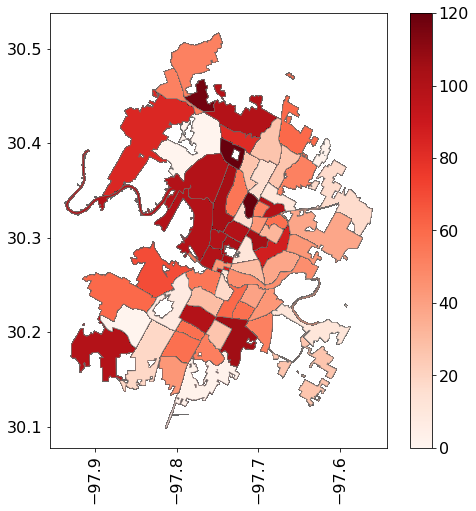

In [22]:
#Crime_type by zip_code
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
new_df.plot(column="crime_type", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=120))
bar_info._A = []
cbar = fig.colorbar(bar_info)

In [23]:
#Crime_type by zip_code
#fig, ax = plt.subplots(1, figsize=(8, 8))
#plt.xticks(rotation=90)
#new_df.plot(column=["council_district","crime_type"], cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
#bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=120))
#bar_info._A = []
#cbar = fig.colorbar(bar_info)

In [24]:
new_df.council_district.value_counts()

2     57077
9     56294
3     51489
4     48490
1     42928
7     39788
5     28305
6     20426
10    16053
8     14768
Name: council_district, dtype: int64

# We predict that there is a relationship between higher seasonal levels of crime and clearance status.

In [25]:
train, validate, test = prepare.split_data(df)

In [26]:
train.shape

(197719, 27)

In [27]:
train2 = train.copy()

In [28]:
#df['occurrence_date']= pd.to_datetime(df['occurrence_date'])
train2 = train2.set_index('occurrence_time').sort_index()

In [29]:
#Split by month first
train2['month'] = train2.index.month_name()
train2['weekdays'] = train2.index.day_name()
train2['year'] = train2.index.year
train2['month_num']=train2.index.month

In [30]:
#train2.groupby(train2.occurrence_date.dt.month).crime_type.count().idxmax()

In [31]:
y = train2.groupby(['weekdays','year'])['crime_type'].count()

In [32]:
y

weekdays   year
Friday     2018    7635
           2019    8190
           2020    7561
           2021    6811
Monday     2018    7249
           2019    7539
           2020    7272
           2021    6451
Saturday   2018    7423
           2019    7689
           2020    7018
           2021    6324
Sunday     2018    7098
           2019    7525
           2020    6893
           2021    6266
Thursday   2018    7169
           2019    7235
           2020    7132
           2021    5998
Tuesday    2018    6995
           2019    7372
           2020    7128
           2021    5934
Wednesday  2018    7020
           2019    7164
           2020    7530
           2021    6098
Name: crime_type, dtype: int64

In [33]:
y_max = train2.groupby(['weekdays','year'])['crime_type'].count().max()

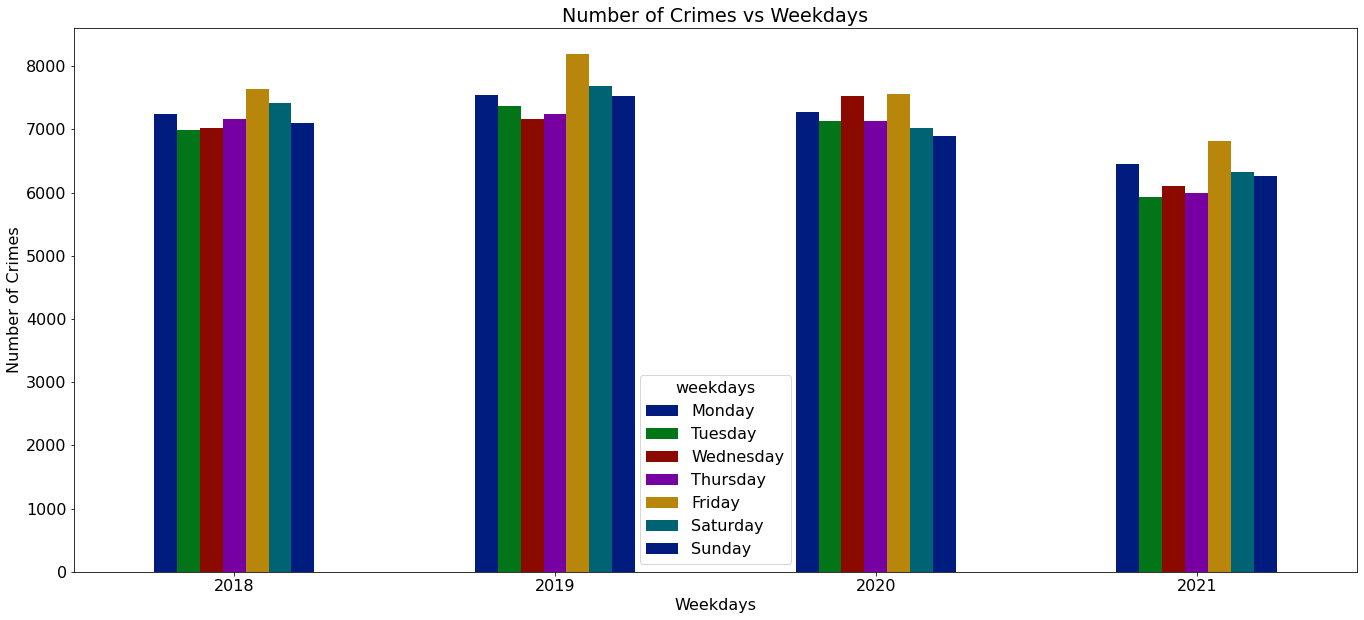

In [34]:
#Take a look at all the crime types
train2['weekdays'] = pd.Categorical(train2['weekdays'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
#overall_mean = df.groupby('month').crime_type.value_counts()
#Assuming 0 = Sunday, 1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 5 = Friday, 6 =Saturday
train2.groupby(['weekdays','year'])['crime_type'].count().unstack(0).plot.bar()
#sns.barplot(x=None, y = y, data = y, ci = None)
plt.title("Number of Crimes vs Weekdays")
plt.xlabel("Weekdays")
plt.ylabel("Number of Crimes")
plt.tick_params('x', rotation=360)
#plt.axhline(overall_mean,color="r")
None

In [35]:
friday_only = ['Friday']

In [36]:
subset_friday = train2.copy()

In [37]:
subset_friday = subset_friday[subset_friday.weekdays.isin(friday_only)]#With just friday only

In [38]:
subset_not_friday = train2.copy()

In [39]:
subset_not_friday = subset_not_friday[~subset_not_friday.weekdays.isin(friday_only)]#Without friday

### Stats Test

We'll be testing the following hypothesis:

$H_0$: There is no difference in crime levels between Fridays and other days of the week.
<br>
$H_a$: There is difference in crime levels between Fridays and other days of the week.

In [40]:
#Do 1 sample t-test compare friday vs the rest
#Need to subset the data just friday only and other exclude the friday and do 1 sample ttest
t_test_ind(subset_not_friday.cleared, subset_friday.cleared)

The t value between the two samples is -0.0506 and the P-Value is 0.9596473938203667.
----------------------------------------------------------------------------
Since the P value is greater than the alpha, we fail to reject the null hypothesis.


In [41]:
train2.tail()

,crime_type,family_violence,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,pandemic_lockdown,the_geom,district_name,battalion_id,code,battalion_code,bureau_name,patrol_area,shape_area,shape_length,month,weekdays,year,month_num
occurrence_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31 23:00:00,BURGLARY OF VEH-NO SUSPECT/FU,N,2021-12-31,2022-01-06 13:04:00,2022-01-06,RESIDENCE / HOME,10414 BROKEN SHOE TRL,78750.0,6,ADAM,30.453633,-97.802507,not cleared,2022-01-13,False,5 days 14:04:00,False,MULTIPOLYGON (((-97.766457391718 30.4326842359...,ADAM 6,21,1272,A1,NORTH,NORTHWEST,8.651601e+07,59271.466409,December,Friday,2021,12
2021-12-31 23:00:00,BURGLARY OF RESIDENCE,N,2021-12-31,2022-01-13 09:44:00,2022-01-13,RESIDENCE / HOME,2501 PARKER LN,78741.0,3,HENRY,30.229872,-97.738235,not cleared,2022-03-15,False,12 days 10:44:00,False,MULTIPOLYGON (((-97.728280447687 30.2474658449...,HENRY 2,205,1300,H1,SOUTH,SOUTHCENTRAL,5.956868e+07,45776.057157,December,Friday,2021,12
2021-12-31 23:21:00,PUBLIC INTOXICATION,N,2021-12-31,2021-12-31 23:21:00,2021-12-31,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,600 W 6TH ST,78701.0,9,GEORGE,30.269900,-97.748559,cleared by arrest,2022-01-12,True,0 days 00:00:00,False,MULTIPOLYGON (((-97.738825827496 30.2721112329...,GEORGE 1,194,1296,G1,NORTH,DTAC,1.649662e+07,22440.194852,December,Friday,2021,12
2021-12-31 23:50:00,ASSAULT ON PUBLIC SERVANT,N,2021-12-31,2021-12-31 23:50:00,2021-12-31,COMMERCIAL / OFFICE BUILDING,111 CONGRESS AVE,78701.0,9,GEORGE,30.263739,-97.743651,cleared by arrest,2022-01-03,True,0 days 00:00:00,False,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",GEORGE 3,194,1299,G1,NORTH,DTAC,8.371570e+06,14491.846845,December,Friday,2021,12
2021-12-31 23:50:00,PUBLIC INTOXICATION,N,2021-12-31,2021-12-31 23:50:00,2021-12-31,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,406 E 6TH ST,78701.0,9,GEORGE,30.267300,-97.738857,cleared by arrest,2021-12-31,True,0 days 00:00:00,False,MULTIPOLYGON (((-97.735785029775 30.2641758809...,GEORGE 2,194,1297,G1,NORTH,DTAC,3.600168e+06,7922.102059,December,Friday,2021,12


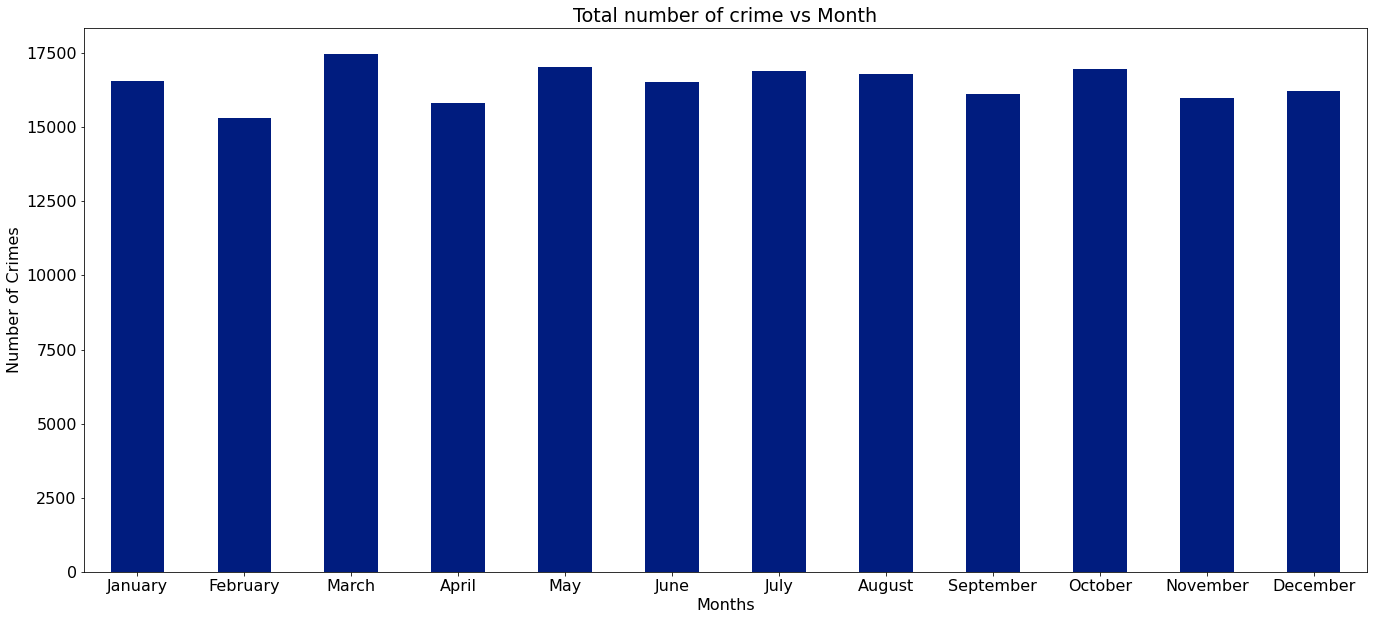

In [42]:
#Take a look at all the crime types
train2['month'] = pd.Categorical(train2['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                                            'September','October', 'November', 'December'])
#overall_mean = df.groupby('month').crime_type.value_counts()
train2.groupby('month').crime_type.count().plot.bar()
plt.title("Total number of crime vs Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.tick_params('x', rotation=360)
#plt.axhline(overall_mean,color="r")
None

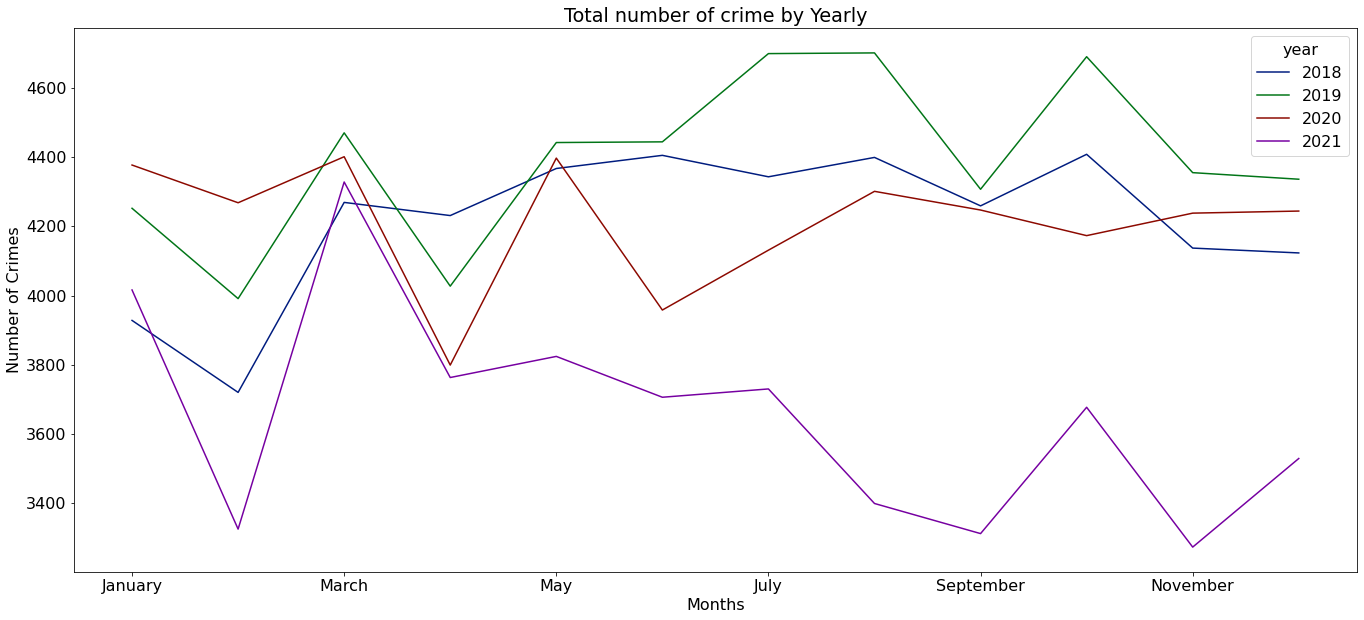

In [43]:
train2.groupby(['year', 'month']).cleared.count().unstack(0).plot.line()
plt.title("Total number of crime by Yearly")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.tick_params('x', rotation=360)
#plt.axhline(overall_mean,color="r")
None

#### Take away 
- From the visuals, we can see that Friday (2019) has higest, all the months have almost the same number of crime and year of 2019. But still need to take a look deeper into which weekday of the year has the higest number.

In [44]:
train2 ['report_hour'] = train2.index.hour

In [45]:
train2 = train2.astype({'report_hour':int}, errors='raise')

In [46]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197719 entries, 2018-01-01 00:00:00 to 2021-12-31 23:50:00
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   crime_type         197719 non-null  object         
 1   family_violence    197719 non-null  object         
 2   occurrence_date    197719 non-null  datetime64[ns] 
 3   report_time        197719 non-null  datetime64[ns] 
 4   report_date        197719 non-null  datetime64[ns] 
 5   location_type      197719 non-null  object         
 6   address            197719 non-null  object         
 7   zip_code           197719 non-null  float64        
 8   council_district   197719 non-null  int64          
 9   sector             197719 non-null  object         
 10  latitude           197719 non-null  float64        
 11  longitude          197719 non-null  float64        
 12  clearance_status   197719 non-null  object         


In [47]:
train2.report_hour.min

<bound method NDFrame._add_numeric_operations.<locals>.min of occurrence_time
2018-01-01 00:00:00     0
2018-01-01 00:00:00     0
2018-01-01 00:00:00     0
2018-01-01 00:00:00     0
2018-01-01 00:00:00     0
                       ..
2021-12-31 23:00:00    23
2021-12-31 23:00:00    23
2021-12-31 23:21:00    23
2021-12-31 23:50:00    23
2021-12-31 23:50:00    23
Name: report_hour, Length: 197719, dtype: int64>

In [48]:
#Create a 6 bins for hour
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [49]:
#Create sessons bins for clear of which season has more crime
def map_month(x):
    if (x > 1) and (x <= 3):
        return 'Spring'
    elif (x > 3) and (x <=7):
        return 'Summer'
    elif (x > 7) and (x <=10):
        return 'Fall'
    elif (x > 10) and (x <=12):
        return 'Winter'

In [50]:
train2['season'] = train2['month_num'].apply(map_month)

In [51]:
train2['report_hour_bins'] = train2['report_hour'].apply(f)

In [52]:
#train2 ['report_hour_bins'] = pd.cut(train2['report_hour'], bins = bins, labels = labels, right = False)
                                                    

In [53]:
train2.sample(10)

,crime_type,family_violence,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,pandemic_lockdown,the_geom,district_name,battalion_id,code,battalion_code,bureau_name,patrol_area,shape_area,shape_length,month,weekdays,year,month_num,report_hour,season,report_hour_bins
occurrence_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-19 09:44:00,THEFT,N,2021-04-19,2021-04-23 12:54:00,2021-04-23,CONVENIENCE STORE,6710 LOYOLA LN,78724.0,1,CHARLIE,30.299636,-97.645467,not cleared,2021-05-03,False,4 days 03:10:00,False,MULTIPOLYGON (((-97.62281561087 30.33085427663...,CHARLIE 7,400,1282,CHAR,CENTRAL,CENTRALEAST,2.790678e+08,173675.204573,April,Monday,2021,4,9,Summer,Morning
2018-06-16 18:00:00,THEFT,N,2018-06-16,2018-07-31 11:41:00,2018-07-31,RESIDENCE / HOME,200 W GRADY DR,78753.0,4,EDWARD,30.374395,-97.685934,not cleared,2018-08-06,False,44 days 17:41:00,False,MULTIPOLYGON (((-97.694118479216 30.3826672092...,EDWARD 1,174,1288,E1,CENTRAL,NORTHEAST,8.356489e+07,46296.345268,June,Saturday,2018,6,18,Summer,Evening
2020-09-30 21:30:00,AUTO THEFT,N,2020-09-30,2020-10-01 15:17:00,2020-10-01,PARKING /DROP LOT/ GARAGE,2450 WICKERSHAM LN,78741.0,3,HENRY,30.224179,-97.726752,not cleared,2020-10-01,False,0 days 17:47:00,False,MULTIPOLYGON (((-97.711351030891 30.2287459749...,HENRY 4,205,1300,H1,SOUTH,SOUTHCENTRAL,4.523399e+07,27115.487629,September,Wednesday,2020,9,21,Fall,Night
2018-11-17 03:50:00,INJ TO ELDERLY FAM/DATE VIOL,Y,2018-11-17,2018-11-17 03:50:00,2018-11-17,RESIDENCE / HOME,11227 SLIPPERY ELM TRL,78750.0,6,ADAM,30.457159,-97.814097,not cleared,2018-11-20,False,0 days 00:00:00,False,MULTIPOLYGON (((-97.766457391718 30.4326842359...,ADAM 6,21,1272,A1,NORTH,NORTHWEST,8.651601e+07,59271.466409,November,Saturday,2018,11,3,Winter,Late Night
2020-12-25 04:27:00,THEFT,N,2020-12-25,2021-01-04 13:25:00,2021-01-04,PARKING /DROP LOT/ GARAGE,5921 ALSACE TRL,78724.0,1,CHARLIE,30.290740,-97.645893,not cleared,2021-01-06,False,10 days 08:58:00,False,MULTIPOLYGON (((-97.628753120132 30.2897194961...,CHARLIE 6,400,1281,CHAR,CENTRAL,CENTRALEAST,6.854670e+07,52268.357217,December,Friday,2020,12,4,Winter,Late Night
2020-02-04 10:45:00,BURGLARY OF VEHICLE,N,2020-02-04,2020-02-04 18:16:00,2020-02-04,PARKING /DROP LOT/ GARAGE,13309 N IH 35 SVRD NB,78753.0,7,EDWARD,30.418528,-97.671824,not cleared,2020-02-05,False,0 days 07:31:00,False,MULTIPOLYGON (((-97.66368813346 30.44938993670...,EDWARD 6,174,1291,E1,CENTRAL,NORTHEAST,1.448894e+08,108031.797015,February,Tuesday,2020,2,10,Spring,Morning
2018-02-12 11:00:00,THEFT,N,2018-02-12,2018-04-11 11:57:00,2018-04-11,RESIDENCE / HOME,1221 SHANNON OAKS TRL,78746.0,8,DAVID,30.276642,-97.820674,not cleared,2018-04-11,False,58 days 00:57:00,False,MULTIPOLYGON (((-97.780302118398 30.2678522249...,DAVID 5,164,1285,D1,SOUTH,SOUTHWEST,2.268465e+08,115450.915093,February,Monday,2018,2,11,Spring,Morning
2021-04-17 22:35:00,THEFT,N,2021-04-17,2021-04-18 17:49:00,2021-04-18,GOVERNMENT / PUBLIC BUILDING,1000 BARTON SPRINGS RD,78704.0,9,DAVID,30.260499,-97.755087,not cleared,2021-04-22,False,0 days 19:14:00,False,MULTIPOLYGON (((-97.775857078995 30.2769648585...,DAVID 1,164,1285,D1,SOUTH,SOUTHWEST,9.343592e+07,69766.306538,April,Saturday,2021,4,22,Summer,Night
2021-11-02 02:44:00,BURGLARY NON RESIDENCE,N,2021-11-02,2021-11-02 02:44:00,2021-11-02,RESTAURANT,8709 N IH 35 SVRD NB,78753.0,4,EDWARD,30.350792,-97.692214,cleared by arrest,2021-11-02,True,0 days 00:00:00,False,MULTIPOLYGON (((-97.675994529923 30.3507803429...,EDWARD 3,174,1289,E1,CENTRAL,NORTHEAST,5.996808e+07,41527.124108,November,Tuesday,2021,11,2,Winter,Late Night


In [54]:
train2.report_hour_bins.value_counts()

Evening          44721
Late Night       36370
Noon             35675
Morning          33922
Night            31376
Early Morning    15655
Name: report_hour_bins, dtype: int64

<AxesSubplot:ylabel='weekdays'>

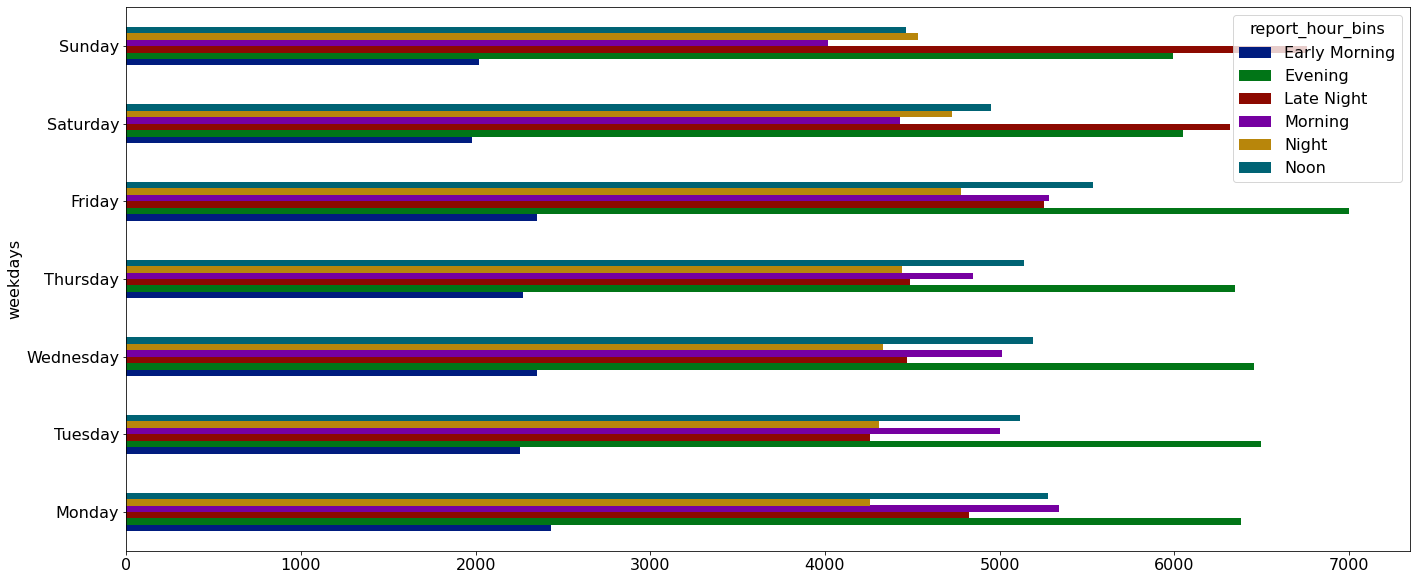

In [55]:
#Quick visual
train2.groupby(['report_hour_bins','weekdays']).clearance_status.count().unstack(0).plot.barh()

In [56]:
#Note: During the evening time there is more crime compare to late night. But which crime is more like to happen at that hour?

In [57]:
#Crime type by hourly that included cleared and not clear
train2.groupby(['weekdays','report_hour_bins','crime_type']).clearance_status.count().sort_values(ascending = False).head(50)

weekdays   report_hour_bins  crime_type         
Tuesday    Evening           BURGLARY OF VEHICLE    845
Wednesday  Evening           BURGLARY OF VEHICLE    827
Friday     Evening           BURGLARY OF VEHICLE    779
Monday     Evening           BURGLARY OF VEHICLE    771
Thursday   Evening           BURGLARY OF VEHICLE    754
Sunday     Evening           BURGLARY OF VEHICLE    667
Friday     Morning           THEFT                  641
Monday     Morning           THEFT                  640
           Noon              THEFT                  633
Friday     Noon              THEFT                  630
Wednesday  Night             BURGLARY OF VEHICLE    614
Friday     Evening           THEFT                  611
Saturday   Noon              THEFT                  611
Wednesday  Morning           THEFT                  606
Sunday     Night             BURGLARY OF VEHICLE    597
Tuesday    Noon              THEFT                  587
Saturday   Evening           BURGLARY OF VEHICLE    584

In [58]:
#Child custody interferseems alot during firday evening, come after that is identity theft

In [59]:
train2.cleared.mean()

0.20703119073027884

<AxesSubplot:ylabel='year'>

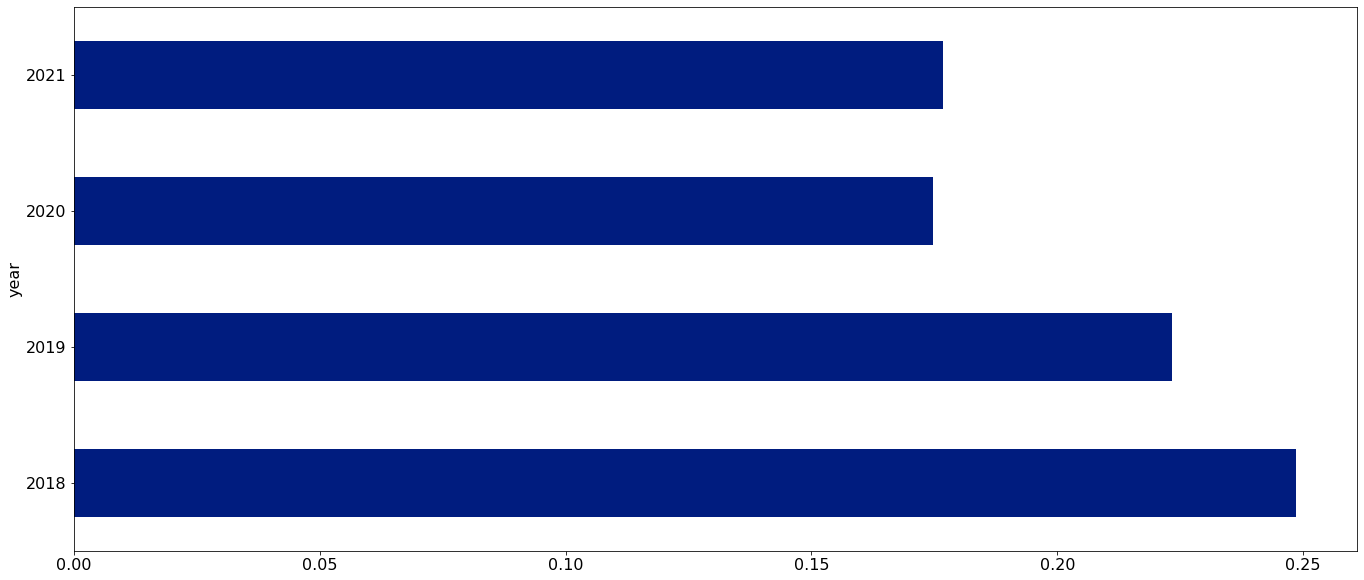

In [60]:
train2.groupby(['year']).cleared.mean().plot.barh()

In [61]:
top_10_list = ['DWI', 'ASSAULT WITH INJURY', 'THEFT BY SHOPLIFTING', 'HARASSMENT', 
                 'AUTO THEFT', 'ASSAULT W/INJURY-FAM/DATE VIOL', 'CRIMINAL MISCHIEF', 
                 'FAMILY DISTURBANCE', 'THEFT', 'BURGLARY OF VEHICLE']

train2['new_crime'] = train2.crime_list.apply(lambda x: [~i for i in top_10_list if i not in x])
#df['all_exclude_cat'] = df.cat.apply(lambda cat: list(set(all_catgs) - set(cat)))    

AttributeError: 'DataFrame' object has no attribute 'crime_list'

In [ ]:
train2.head()

In [ ]:
train2.groupby(['season', 'weekdays']).clearance_status.count().unstack(0).plot.bar();

In [ ]:
#Take a look at patrol area
#Keep in mind that True is the case is cleared and False is not clear
train2.groupby(['season','patrol_area','occurrence_date','crime_type','cleared']).clearance_status.count().sort_values(ascending=False).head(50)

In [ ]:
#Interesting to see that in southwest, theft from person happned alot in the fall nearly 200 cases not been clear. 

In [ ]:
season = ['Spring', 'Summer', 'Fall', 'Winter']

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (14, 40))

for index, crime_type in enumerate(season):
    # sns.barplot(
    #     data = train2[train2.season == crime_type],
    #     x = 'year',
    #     y = 'cleared',
    #     ci = None,
    #     ax = ax[index]
    # )
    
    train2[train2.season == crime_type].groupby('year').cleared.count().plot.bar(ax = ax[index])

    ax[index].set_xlabel('Years')
    ax[index].set_ylabel('Percentage of cases cleared')

    ax[index].set_title(crime_type)
    
plt.tight_layout();

In [ ]:
ax = train2.groupby(['year', 'month']).cleared.mean().unstack(0).plot.line()
plt.title("Total number of clearance rate by year")
plt.xlabel("Months")
plt.ylabel("Clearance rate")
plt.tick_params('x', rotation=360)
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
#ax.set_ylim(bottom=)

In [ ]:
ax = train2.groupby(['year', 'month']).crime_type.count().unstack(0).plot.line()
plt.title("Crime frequency by year")
plt.xlabel("Months")
plt.ylabel("Number of crimes")
plt.tick_params('x', rotation=360)
#plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
#ax.set_ylim(bottom=)